In [28]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/jatin/Documents/Finlatics/DsResearch/Digital Marketing/online_advertising_performance_data.csv")
df = pd.DataFrame(data)
print(df)

       month  day campaign_number user_engagement     banner placement  \
0      April    1          camp 1            High  160 x 600       abc   
1      April    1          camp 1            High  160 x 600       def   
2      April    1          camp 1            High  160 x 600       ghi   
3      April    1          camp 1            High  160 x 600       mno   
4      April    1          camp 1             Low  160 x 600       def   
...      ...  ...             ...             ...        ...       ...   
15403  April    1          camp 1             Low  160 x 600       ghi   
15404  April    1          camp 1             Low  160 x 600       mno   
15405   June   29          camp 1            High  800 x 250       ghi   
15406   June   29          camp 1            High  800 x 250       mno   
15407   June   29          camp 3            High  240 x 400       def   

       displays      cost  clicks   revenue  post_click_conversions  \
0             4    0.0060       0    0.0

In [29]:
print(df.info(), "\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [30]:
engagement_unique_count = df["user_engagement"].value_counts()
print(engagement_unique_count)

user_engagement
Medium    5489
Low       5035
High      4884
Name: count, dtype: int64


# Q1

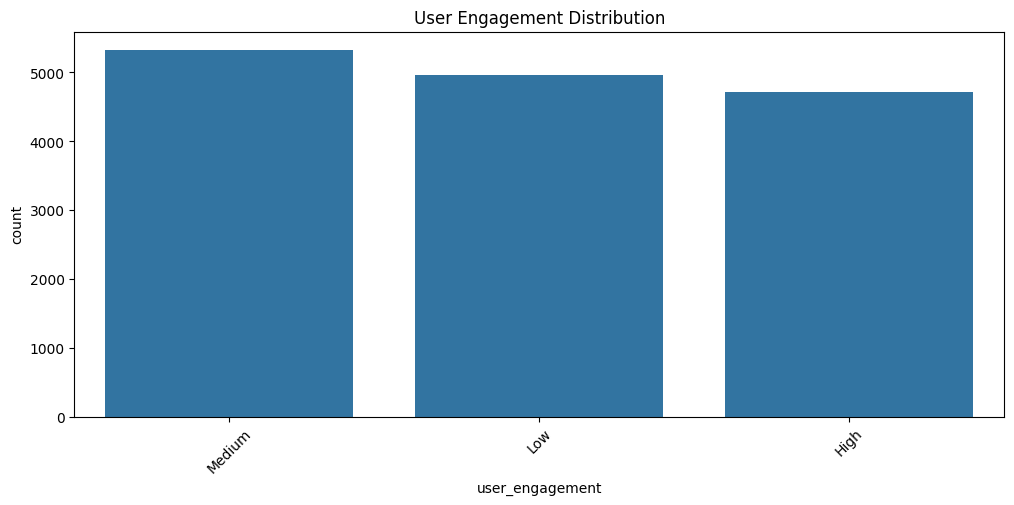

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.drop(columns=["Unnamed: 12", "Unnamed: 13"], errors="ignore")

df = df.dropna(subset=["placement"])

df["date"] = pd.to_datetime(df["month"] + " " + df["day"].astype(str) + ", 2020")

df = df.drop(columns=["month", "day"])

plt.figure(figsize=(12,5))
sns.countplot(data=df, x="user_engagement", order=df["user_engagement"].value_counts().index)
plt.title("User Engagement Distribution")
plt.xticks(rotation=45)
plt.show()

# Q2

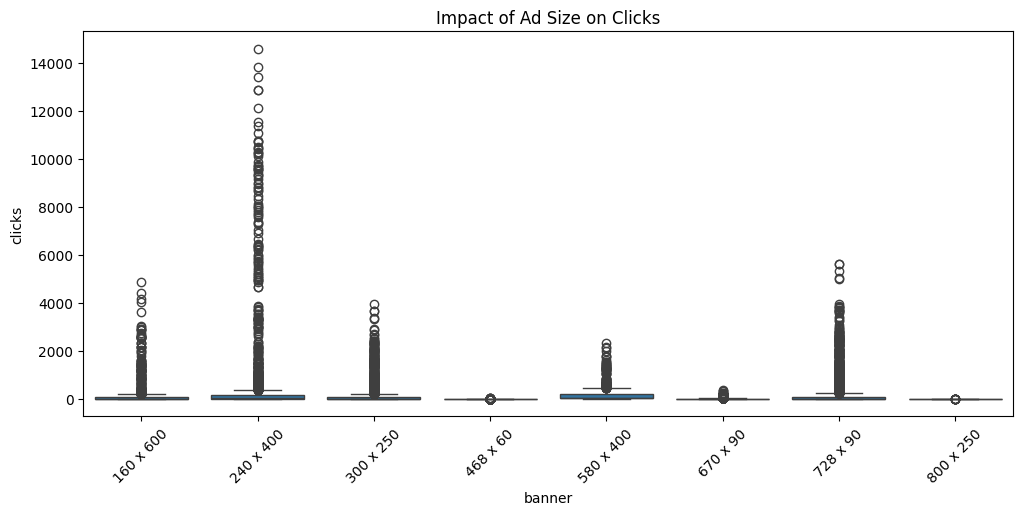

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="banner", y="clicks")
plt.title("Impact of Ad Size on Clicks")
plt.xticks(rotation=45)
plt.show()

# Q3

In [33]:
placement_stats = df.groupby("placement")[["displays", "clicks"]].sum().sort_values(by="displays", ascending=False)
print(placement_stats.head())

            displays   clicks
placement                    
mno        143161775   993039
ghi         59740415  1247049
def         28177492   176097
jkl          7692732    75063
abc           242142     1584


# Q4

In [34]:
corr = df[["cost", "revenue"]].corr()
print("Correlation between cost and revenue:\n", corr)

Correlation between cost and revenue:
              cost   revenue
cost     1.000000  0.760258
revenue  0.760258  1.000000


# Q5

In [35]:
df["revenue_per_click"] = df["revenue"] / df["clicks"].replace(0, np.nan)
print("Average Revenue per Click:", df["revenue_per_click"].mean())

Average Revenue per Click: 0.0929432967821166


# Q6

In [36]:
df["conversion_rate"] = df["post_click_conversions"] / df["clicks"].replace(0, np.nan)
campaign_conversion = df.groupby("campaign_number")["conversion_rate"].mean().sort_values(ascending=False)
print("Top Campaigns by Conversion Rate:\n", campaign_conversion.head())

Top Campaigns by Conversion Rate:
 campaign_number
camp 1    0.357042
camp 3    0.045473
camp 2    0.020111
Name: conversion_rate, dtype: float64


# Q7

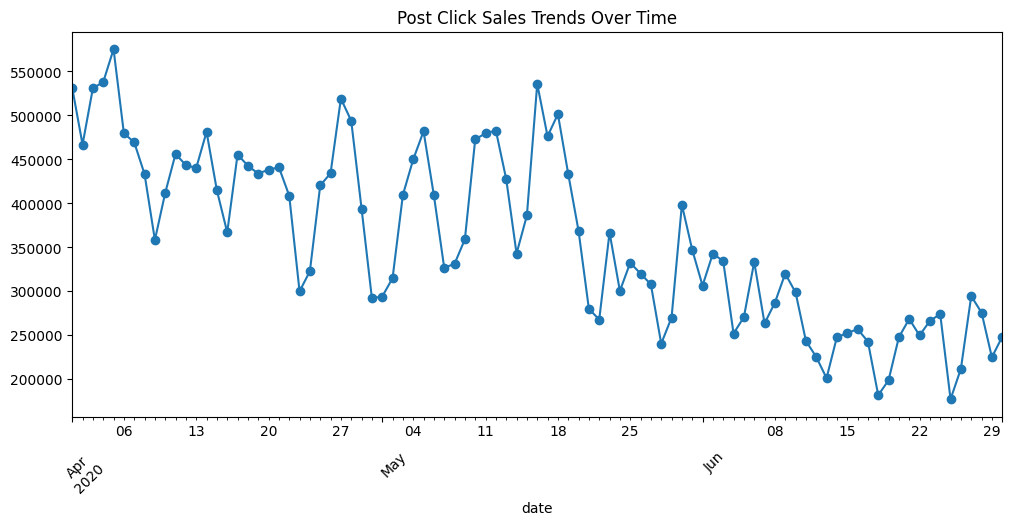

In [37]:
plt.figure(figsize=(12,5))
df.groupby("date")["post_click_sales_amount"].sum().plot(marker="o")
plt.title("Post Click Sales Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Q8

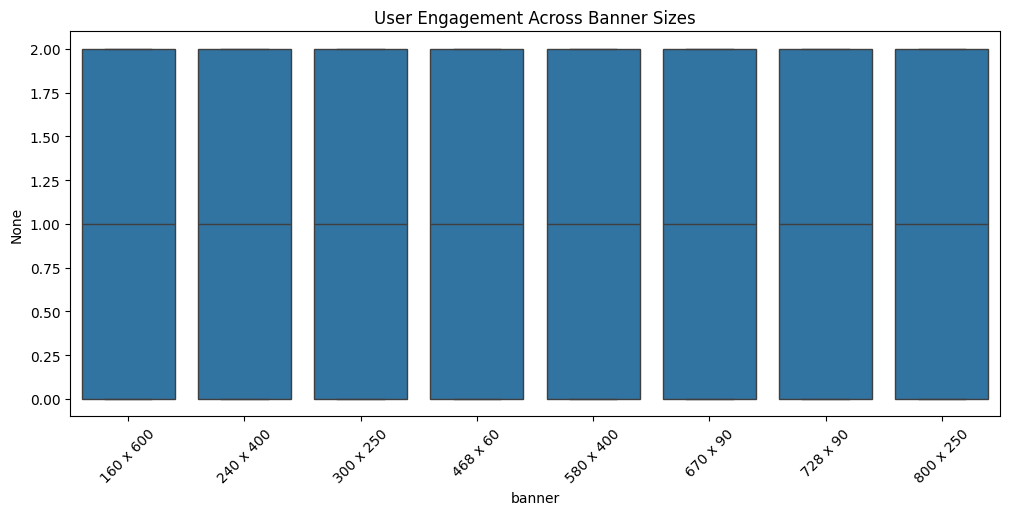

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="banner", y=df["user_engagement"].astype("category").cat.codes)
plt.title("User Engagement Across Banner Sizes")
plt.xticks(rotation=45)
plt.show()

# Q9

In [39]:
placement_conversion = df.groupby("placement")["conversion_rate"].mean().sort_values(ascending=False)
print("Top Placement Types by Conversion Rate:\n", placement_conversion.head())

Top Placement Types by Conversion Rate:
 placement
abc    0.301971
jkl    0.224332
ghi    0.187649
mno    0.182342
def    0.152955
Name: conversion_rate, dtype: float64


# Q10

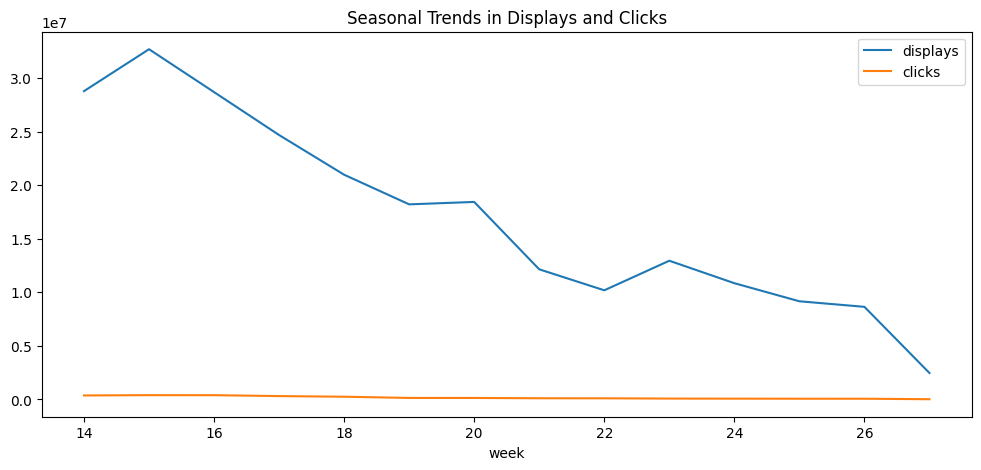

In [40]:
df["week"] = df["date"].dt.isocalendar().week
weekly_stats = df.groupby("week")[["displays", "clicks"]].sum()
weekly_stats.plot(kind="line", figsize=(12,5))
plt.title("Seasonal Trends in Displays and Clicks")
plt.show()

# Q11

In [41]:
engagement_revenue_corr = df.groupby("user_engagement")["revenue"].mean().sort_values(ascending=False)
print("Revenue by User Engagement:\n", engagement_revenue_corr)

Revenue by User Engagement:
 user_engagement
High      45.076201
Medium    11.048293
Low        1.037745
Name: revenue, dtype: float64


# Q12

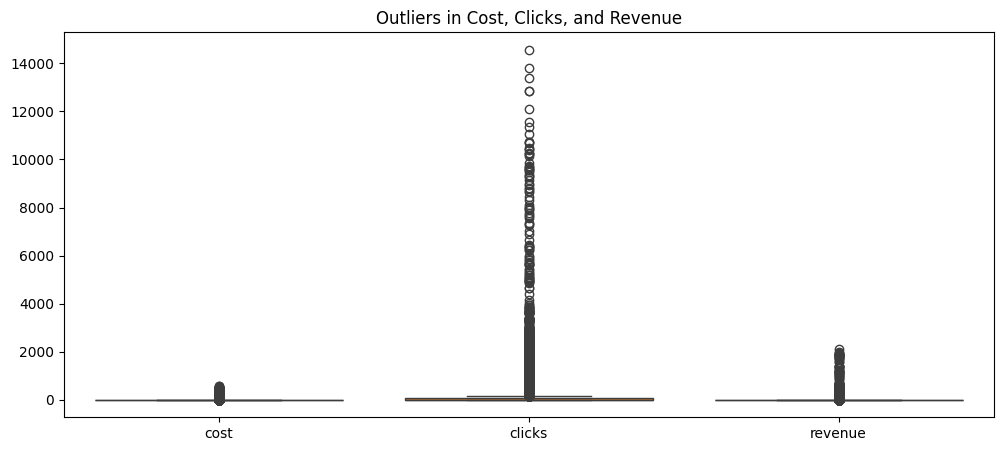

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[["cost", "clicks", "revenue"]])
plt.title("Outliers in Cost, Clicks, and Revenue")
plt.show()

# Q13

In [43]:
effectiveness = df.groupby(["banner", "placement"])[["clicks", "post_click_conversions"]].sum()
print("Campaign Effectiveness:\n", effectiveness.head())

Campaign Effectiveness:
                      clicks  post_click_conversions
banner    placement                                
160 x 600 abc             3                       0
          def         20257                    2525
          ghi          9799                    4021
          jkl             0                       0
          mno        209511                   42239


# Q14

In [44]:
df["ROI"] = df["revenue"] / df["cost"].replace(0, np.nan)
roi_stats = df.groupby("campaign_number")["ROI"].mean().sort_values(ascending=False)
print("Top Campaigns by ROI:\n", roi_stats.head())

Top Campaigns by ROI:
 campaign_number
camp 1    2.189996
camp 3    1.822633
camp 2    1.643087
Name: ROI, dtype: float64


# Q15

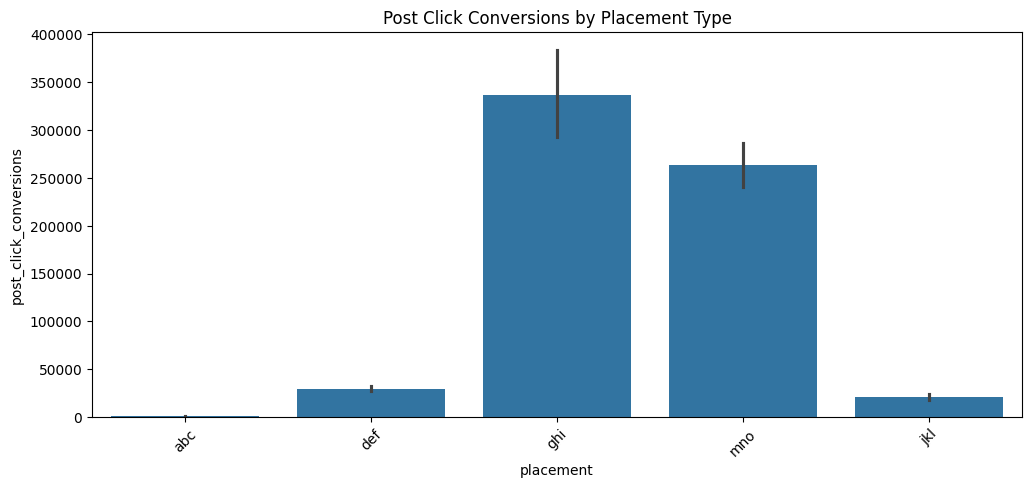

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="placement", y="post_click_conversions", estimator=sum)
plt.title("Post Click Conversions by Placement Type")
plt.xticks(rotation=45)
plt.show()

# Q16

In [46]:
df["weekday"] = df["date"].dt.weekday
weekday_engagement = df.groupby("weekday")["user_engagement"].value_counts().unstack()
print("User Engagement by Weekday:\n", weekday_engagement)

User Engagement by Weekday:
 user_engagement  High  Low  Medium
weekday                           
0                 677  704     754
1                 670  703     757
2                 665  731     780
3                 669  711     768
4                 672  694     748
5                 679  703     757
6                 677  713     763


# Q17

In [47]:
df["CPC"] = df["cost"] / df["clicks"].replace(0, np.nan)
cpc_stats = df.groupby(["campaign_number", "banner"])["CPC"].mean().sort_values(ascending=True)
print("Campaigns with Lowest CPC:\n", cpc_stats.head())

Campaigns with Lowest CPC:
 campaign_number  banner   
camp 3           800 x 250    0.000500
camp 2           800 x 250    0.007000
camp 3           468 x 60     0.010349
camp 2           580 x 400    0.013092
                 240 x 400    0.023859
Name: CPC, dtype: float64


# Q18

In [48]:
df["cost_per_conversion"] = df["cost"] / df["post_click_conversions"].replace(0, np.nan)
cost_effective = df.groupby(["campaign_number", "placement"])["cost_per_conversion"].mean().sort_values()
print("Most Cost-Effective Campaigns for Conversions:\n", cost_effective.head())

Most Cost-Effective Campaigns for Conversions:
 campaign_number  placement
camp 1           abc          0.163195
                 jkl          0.263877
camp 3           abc          0.317597
camp 1           ghi          0.325304
                 mno          0.474666
Name: cost_per_conversion, dtype: float64


# Q19

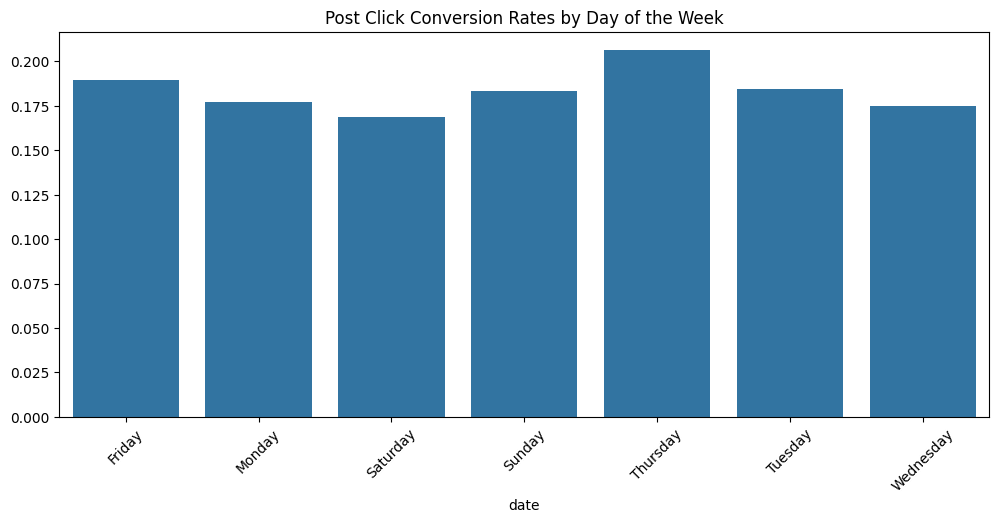

In [49]:
daily_conversion = df.groupby(df["date"].dt.day_name())["conversion_rate"].mean()
plt.figure(figsize=(12,5))
sns.barplot(x=daily_conversion.index, y=daily_conversion.values)
plt.title("Post Click Conversion Rates by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Q20

In [50]:
engagement_conversion = df.groupby("user_engagement")["conversion_rate"].mean().sort_values(ascending=False)
print("Conversion Rates by User Engagement:\n", engagement_conversion)

Conversion Rates by User Engagement:
 user_engagement
High      0.425424
Medium    0.073980
Low       0.049346
Name: conversion_rate, dtype: float64
